In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=d88ac3deb86d6ab6ba7e13d37ea5b13a3dfb153d3d0c9aa5932beed5b9861bdf
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession


# Create a SparkContext object
sc = SparkContext("local", "Q5")

In [72]:

import pyspark.sql as ps
from pyspark.sql.functions import length, col, collect_list, substring,count,count_distinct

In [ ]:
spark = SparkSession.builder.getOrCreate()
df=spark.read.csv('Movies.csv', header=True)

In [ ]:
df.show()

+----+------+--------------------+-------+--------------------+-----------------+--------------------+----------+------+-------------------+
|Year|Length|               Title|  Genre|               Actor|          Actress|            Director|Popularity|Awards|              Image|
+----+------+--------------------+-------+--------------------+-----------------+--------------------+----------+------+-------------------+
|1990|   111|Tie Me Up! Tie Me...| Comedy|     BanderasAntonio|    AbrilVictoria|      AlmodóvarPedro|        68|    No|   NicholasCage.png|
|1991|   113|          High Heels| Comedy|          BoséMiguel|    AbrilVictoria|      AlmodóvarPedro|        68|    No|   NicholasCage.png|
|1983|   104|        Dead ZoneThe| Horror|   WalkenChristopher|      AdamsBrooke|     CronenbergDavid|        79|    No|   NicholasCage.png|
|1979|   122|                Cuba| Action|         ConnerySean|      AdamsBrooke|       LesterRichard|         6|    No|    seanConnery.png|
|1978|    94|

In [ ]:
#Q5
num=sc.accumulator(0)
rdd1=sc.parallelize(range(1,11))
def f(x):
  global num
  num+=x


rdd1.foreach(f)
final=num.value
print("Final value:",final)

Final value: 55


In [ ]:
#Q6
df.filter(df.Awards=='Yes').filter(df.Genre=='Action').select("Title","Year","Director").show()

+-----+----+--------+
|Title|Year|Director|
+-----+----+--------+
+-----+----+--------+



In [ ]:
#Q7
df.filter(df.Awards=='Yes').select("Actor","Title","Director").show()

+--------------------+--------------------+-------------------+
|               Actor|               Title|           Director|
+--------------------+--------------------+-------------------+
|       AhlstedtBörje| Fanny and Alexander|      BergmanIngmar|
|TrintignantJean-L...|     A Man & a Woman|      LelouchClaude|
|TrintignantJean-L...|Un Hombre y una M...|      LelouchClaude|
|       AlterioHector|   Official StoryThe|         PuenzoLuiz|
|      SjöströmVictor|   Wild Strawberries|      BergmanIngmar|
|   BjörnstrandGunnar|Through a Glass D...|      BergmanIngmar|
|     JosephsonErland|    Cries & Whispers|      BergmanIngmar|
|  PlummerChristopher|   Sound of MusicThe|         WiseRobert|
| LaFontJean-Philippe|     Babette's Feast|        AxelGabriel|
|        BalsamMartin|Murder on the Ori...|        LumetSidney|
|      HopkinsAnthony|     Elephant ManThe|         LynchDavid|
|          WallaceDee|E. T. The Extra-T...|    SpielbergSteven|
|           CaanJames|              Mise

In [ ]:
#Q8
df.filter(df.Awards=='No').sort(df.Popularity.desc()).select("Title").limit(10).show()

+--------------------+
|               Title|
+--------------------+
|        Tango & Cash|
|              Plenty|
|Masque of the Red...|
|           Lionheart|
|        Judge Priest|
|           Dead-Bang|
|       Basil The Rat|
|               Glitz|
|            Morituri|
|Naked Gun: From t...|
+--------------------+



In [ ]:
#Q9
df.filter(df.Year<1980).sort(df.Popularity.asc()).select("Title").limit(10).show()

+------------------+
|             Title|
+------------------+
|   White Lightning|
|      Desert Rider|
|      Drop KickThe|
| Bank on the Stars|
|Shout at the Devil|
|           Shalako|
|     Anna Christie|
|           Airport|
| Tales of Tomorrow|
|          Stavisky|
+------------------+



In [ ]:
#Q10
df.filter(df.Year<1990).sort(df.Title).show()

+----+------+--------------------+---------------+--------------------+-----------------+-------------------+----------+------+-------------------+
|Year|Length|               Title|          Genre|               Actor|          Actress|           Director|Popularity|Awards|              Image|
+----+------+--------------------+---------------+--------------------+-----------------+-------------------+----------+------+-------------------+
|1968|   139|2001: A Space Ody...|Science Fiction|          DulleaKeir|   TyzackMargaret|     KubrickStanley|        83|    No|   NicholasCage.png|
|1982|    92|             48 Hrs.|         Action|           NolteNick|   O'TooleAnnette|         HillWalter|        67|    No|   NicholasCage.png|
|1963|   138|               8 1/2|          Drama| MastroianniMarcello| CardinaleClaudia|    FelliniFederico|        80|   Yes|   NicholasCage.png|
|1966|    95|A Big Hand for th...|         Comedy|          FondaHenry|   WoodwardJoanne|        CookFielder|   

In [75]:
#Q11
df=spark.read.csv('wine.csv', header=True)
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation

In [26]:
def remove_outliers(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)
   IQR=q3-q1
   
   ''' Removing the Outliers '''
   df = df[~((df < (q1 - 1.5 * IQR)) |(df > (q3 + 1.5 * IQR)))]
   return df

In [80]:
from pyspark import pandas as ps

In [76]:
df.show()

+-------+----------+----+------------+---------+-------------+----------+--------------------+---------------+---------------+----+-----+-------+
|Alcohol|Malic_Acid| Ash|Ash_Alcanity|Magnesium|Total_Phenols|Flavanoids|Nonflavanoid_Phenols|Proanthocyanins|Color_Intensity| Hue|OD280|Proline|
+-------+----------+----+------------+---------+-------------+----------+--------------------+---------------+---------------+----+-----+-------+
|  14.23|      1.71|2.43|        15.6|      127|          2.8|      3.06|                0.28|           2.29|           5.64|1.04| 3.92|   1065|
|   13.2|      1.78|2.14|        11.2|      100|         2.65|      2.76|                0.26|           1.28|           4.38|1.05|  3.4|   1050|
|  13.16|      2.36|2.67|        18.6|      101|          2.8|      3.24|                 0.3|           2.81|           5.68|1.03| 3.17|   1185|
|  14.37|      1.95| 2.5|        16.8|      113|         3.85|      3.49|                0.24|           2.18|            7.

In [82]:
# Convert the values in the Alcohol column to float type
pdf = df.select(col("Alcohol").cast("float"))
ps.DataFrame(pdf).plot(kind="scatter")

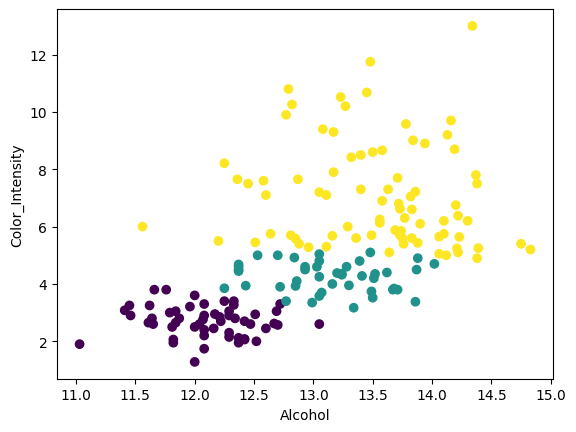

In [83]:
from pyspark.ml.clustering import KMeans, BisectingKMeans
from pyspark.ml.feature import VectorAssembler

df = df.withColumn("Alcohol", col("Alcohol").cast("double"))
df = df.withColumn("Color_Intensity", col("Color_Intensity").cast("double"))
if "features" in df.columns:
    df = df.drop("features")
assembler = VectorAssembler(inputCols=["Alcohol", "Color_Intensity"], outputCol="features")
df = assembler.transform(df)

# K-means clustering
kmeans = KMeans(k=3, seed=1)
model = kmeans.fit(df)
predictions = model.transform(df)

# Bisecting K-means clustering
bkm = BisectingKMeans(k=3, seed=1)
model = bkm.fit(df)
predictions = model.transform(df)

pandas_df = predictions.select("*").toPandas()

# Plot the clusters
plt.scatter(pandas_df["Alcohol"], pandas_df["Color_Intensity"], c=pandas_df["prediction"])
plt.xlabel("Alcohol")
plt.ylabel("Color_Intensity")
plt.show()